In [51]:
import sound
import scipy
from scipy.io import wavfile
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
#import librosa
audiofile = "Track16.wav"

font = {'family' : 'normal',
        'weight' : 'bold',
        'size': 16}
plt.rc('font', **font)


In [2]:
fs, data = wavfile.read(audiofile)

In [3]:
fs

16000

In [4]:
data.shape

(447573, 2)

In [7]:
sound.sound(data, fs) # smth wrong

Stereo


OSError: [Errno -9997] Invalid sample rate

In [12]:
# extract 8 seconds from the middle
duration = data.shape[0] / fs
time_fragment = [duration/2 - 4, duration/2 + 4]
samples_fragment = data[int(time_fragment[0]*fs):int(time_fragment[1]*fs)]

In [49]:
# normalise to 1
print(samples_fragment.dtype, samples_fragment.shape)
max_value = float(samples_fragment.max())
min_value = float(samples_fragment.min())
print(max_value, min_value)
#samples_fragment_norm = np.zeros_like(samples_fragment, dtype='double')
#samples_fragment_norm = (np.array(samples_fragment, dtype='int32') + min_value) / (max_value - min_value)
samples_fragment_norm = (samples_fragment - min_value) / (max_value - min_value) 
samples_fragment_norm.min(), samples_fragment_norm.max()

int16 (128000, 2)
23259.0 -19869.0


(0.0, 1.0)

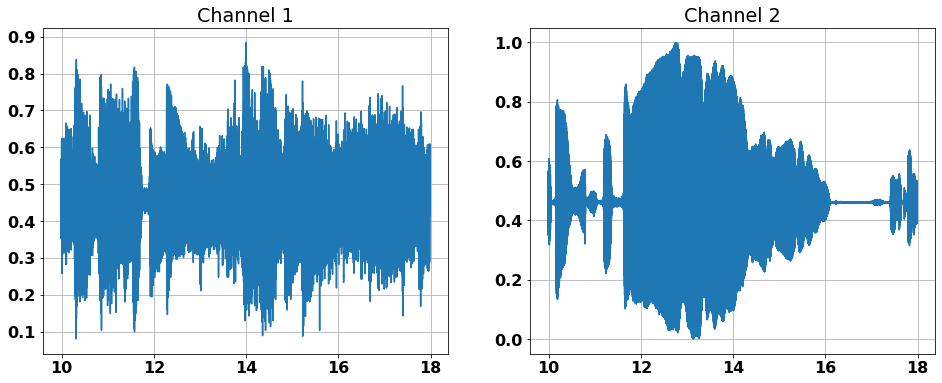

In [62]:
# plot both channels separately
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot(121)
ax.plot(np.linspace(*time_fragment, samples_fragment_norm.shape[0]), samples_fragment_norm[:, 0])
ax.grid()
plt.title("Channel 1")

ax = fig.add_subplot(122)
ax.plot(np.linspace(*time_fragment, samples_fragment_norm.shape[0]), samples_fragment_norm[:, 1])
ax.grid()
plt.title("Channel 2")

plt.show()

In [98]:
# Task 2
N = 4
blocks = np.array(data[:N*1024, 0])
blocks = blocks.reshape((N, 1024))
fft_blocks = np.fft.fft(blocks)
fft_blocks.shape

(4, 1024)

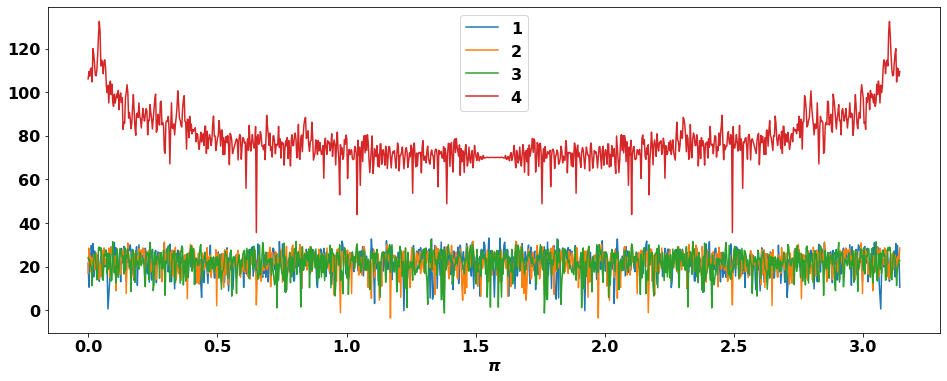

In [102]:
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot()
for i in range(N):
    ax.plot(np.linspace(0, np.pi, 1024), 20*np.log10(np.abs(fft_blocks[i])))
    
plt.legend(list(range(1, N+1)))
plt.xlabel('$\pi$')
plt.ylabel('dB')
plt.title('')
plt.show()

In [83]:
blocks.reshape(4, 1024)

array([[   0,    0,    0, ...,    1,    0,    0],
       [   0,   -1,   -1, ...,    0,    1,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ..., 1730, 3638, 5489]], dtype=int16)